100%|██████████| 9.91M/9.91M [00:01<00:00, 4.97MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 130kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.23MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.5MB/s]


Epoch [1/20]  |  Train Acc: 93.85%  |  Val Acc: 98.04%
Epoch [2/20]  |  Train Acc: 98.25%  |  Val Acc: 98.44%
Epoch [3/20]  |  Train Acc: 98.81%  |  Val Acc: 98.80%
Epoch [4/20]  |  Train Acc: 99.14%  |  Val Acc: 98.90%
Epoch [5/20]  |  Train Acc: 99.27%  |  Val Acc: 98.70%
Epoch [6/20]  |  Train Acc: 99.42%  |  Val Acc: 99.10%
Epoch [7/20]  |  Train Acc: 99.47%  |  Val Acc: 99.09%
Epoch [8/20]  |  Train Acc: 99.65%  |  Val Acc: 98.92%
Epoch [9/20]  |  Train Acc: 99.60%  |  Val Acc: 99.21%
Epoch [10/20]  |  Train Acc: 99.77%  |  Val Acc: 99.18%
Epoch [11/20]  |  Train Acc: 99.77%  |  Val Acc: 99.14%
Epoch [12/20]  |  Train Acc: 99.74%  |  Val Acc: 99.02%
Epoch [13/20]  |  Train Acc: 99.76%  |  Val Acc: 99.04%
Epoch [14/20]  |  Train Acc: 99.84%  |  Val Acc: 99.13%
Epoch [15/20]  |  Train Acc: 99.84%  |  Val Acc: 99.06%
Epoch [16/20]  |  Train Acc: 99.81%  |  Val Acc: 99.12%
Epoch [17/20]  |  Train Acc: 99.91%  |  Val Acc: 99.19%
Epoch [18/20]  |  Train Acc: 99.88%  |  Val Acc: 99.11%
E

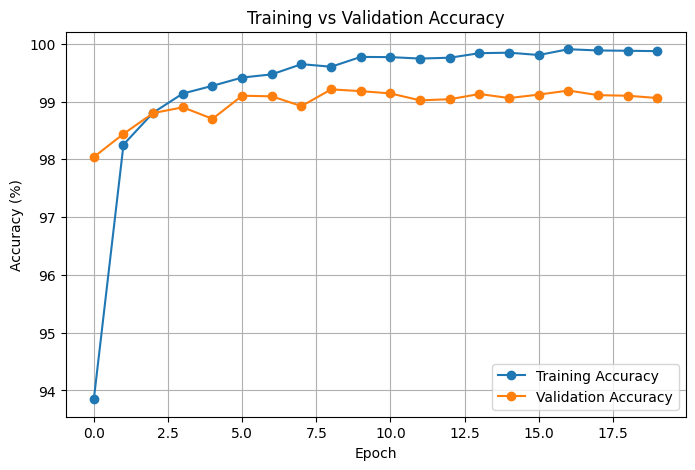

In [ ]:
# -----------------------------------------------------------
# Convolutional Neural Network (CNN) for Image Classification
# Using PyTorch
# -----------------------------------------------------------

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. Data Preprocessing and Loading
# -----------------------------------------------------------

# Define a transformation pipeline:
# - Converts images to tensors
# - Normalizes pixel values to range [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training dataset (e.g., MNIST)
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders for batch processing
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=64, shuffle=False)

# -----------------------------------------------------------
# 2. Define the CNN Architecture
# -----------------------------------------------------------

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        # First convolutional layer:
        # - Input channels: 1 (grayscale)
        # - Output channels: 16 filters
        # - Kernel size: 3x3
        # - Padding: 1 (to preserve spatial dimensions)
        # - Stride: 1 (default)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)

        # Second convolutional layer:
        # - Input channels: 16
        # - Output channels: 32
        # - Kernel size: 3x3
        # - Padding: 1
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)

        # Max pooling layer:
        # - Kernel size: 2x2
        # - Stride: 2 (reduces spatial dimension by half)
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        # - Input size: 32 * 7 * 7 (after pooling twice from 28x28)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)  # First dense layer
        self.fc2 = nn.Linear(128, 10)          # Output layer (10 classes)

    def forward(self, x):
        # Apply first convolution + ReLU activation + pooling
        x = self.pool(F.relu(self.conv1(x)))

        # Apply second convolution + ReLU activation + pooling
        x = self.pool(F.relu(self.conv2(x)))

        # Flatten the tensor into a vector for fully connected layers
        x = x.view(-1, 32 * 7 * 7)

        # Apply first fully connected layer + ReLU
        x = F.relu(self.fc1(x))

        # Output layer (no activation here; handled by loss function)
        x = self.fc2(x)
        return x

# Instantiate the model
model = CNNModel()

# -----------------------------------------------------------
# 3. Define Loss Function and Optimizer
# -----------------------------------------------------------

# CrossEntropyLoss is suitable for multi-class classification
criterion = nn.CrossEntropyLoss()

# Adam optimizer adapts learning rate during training
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -----------------------------------------------------------
# 4. Training the Model
# -----------------------------------------------------------

num_epochs = 20
train_acc_history = []
val_acc_history = []

for epoch in range(num_epochs):
    # ----- Training Phase -----
    model.train()  # Set model to training mode
    correct, total = 0, 0

    for images, labels in train_loader:
        optimizer.zero_grad()       # Reset gradients
        outputs = model(images)     # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()             # Backpropagation
        optimizer.step()            # Update weights

        # Compute training accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    train_acc_history.append(train_accuracy)

    # ----- Validation Phase -----
    model.eval()  # Set model to evaluation mode
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy = 100 * correct / total
    val_acc_history.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}]  |  Train Acc: {train_accuracy:.2f}%  |  Val Acc: {val_accuracy:.2f}%")

# -----------------------------------------------------------
# 5. Plot Training vs Validation Accuracy
# -----------------------------------------------------------

plt.figure(figsize=(8,5))
plt.plot(train_acc_history, label='Training Accuracy', marker='o')
plt.plot(val_acc_history, label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0     0.9969    0.9929    0.9949       980
           1     0.9947    0.9974    0.9960      1135
           2     0.9942    0.9893    0.9917      1032
           3     0.9911    0.9931    0.9921      1010
           4     0.9899    0.9949    0.9924       982
           5     0.9758    0.9933    0.9844       892
           6     0.9968    0.9749    0.9858       958
           7     0.9836    0.9912    0.9874      1028
           8     0.9928    0.9918    0.9923       974
           9     0.9891    0.9861    0.9876      1009

    accuracy                         0.9906     10000
   macro avg     0.9905    0.9905    0.9905     10000
weighted avg     0.9906    0.9906    0.9906     10000



<Figure size 800x600 with 0 Axes>

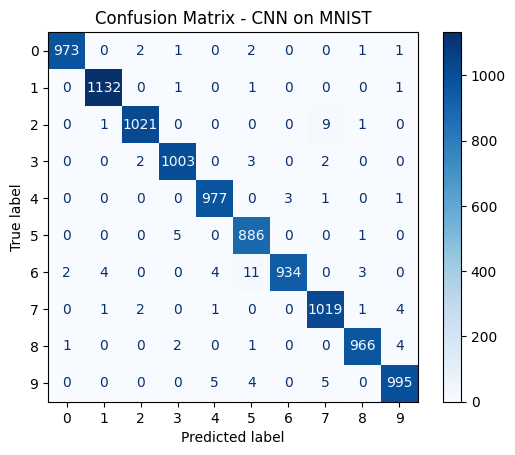

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Set the model to evaluation mode
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())          # True labels
        y_pred.extend(predicted.numpy())       # Predicted labels

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - CNN on MNIST")
plt.show()